使用传统的条件生成模型通过图像生成文本，可能会是多种同类对象的平均，这个时候产生的图像可能是模糊不准确的。

在条件生成GAN中的生成器部分，我们会同时输入一个条件$c$和一个随机分布$z$，而在判别器阶段输入需要同时有条件$c$和生成器得到的$\tilde{x}$，目标任务是需要判定输出的$\tilde{x}$是否为真的同时，还需要判定条件$c$与$\tilde{x}$是否匹配，如果只是判定$\tilde{x}$是否为真，那是不能按照我们条件生成图像或文本的。

正确配对：正确文字 + 正确图像；

不正确配对：不正确文字 + 正确图像，或正确文字 + 不正确（模糊）图像

条件生成GAN的算法步骤：

判别器：
* 从数据库中sample出m个正例样本$\{(c^1,x^1),(c^2,x^2),\cdots,(c^m,x^m)\}$
* 从一个分布中随机sample出m个噪声样本$\tilde{z}^1,\tilde{z}^2,\cdots,\tilde{z}^m$
* 使用生成器生成样本$\tilde{x}^1,\tilde{x}^2,\cdots,\tilde{x}^m$，$\tilde{x}^i=G(c^i, z^i)$
* 更新判别器参数$\theta_d$，使得如下最大化：
$$\tilde{V}=\frac{1}{m}\sum_{i=1}^m\log D(c^i, x^i) + \frac{1}{m}\sum_{i=1}^m\log\bigr(1-D(c^i,\tilde{x}^i)\bigr) + \frac{1}{m}\sum_{i=1}^m\log\bigr(1-D(c^i,\tilde{x}^i)\bigr)$$
$$\theta_d \gets \theta_d + \eta \nabla \tilde{V}(\theta_g)$$
>说明：公式中加入的后两项，就是两种不正确匹配需要最小化。

生成器：
* 从一个分布中随机生成不同的m个噪声样本$\tilde{z}^1,\tilde{z}^2,\cdots,\tilde{z}^m$
* 从数据库中sample出m个条件$\{c^1,c^2,\cdots,c^m\}$
* 更新生成器参数$\theta_g$，使得如下最大化：
    $$\tilde{V} = \frac{1}{m}\sum_{i=1}^m\log \left(D\bigr(G(c^i,z^i)\bigr)\right)$$
    $$\theta_g \gets \theta_g - \eta \nabla \tilde{V}(\theta_g)$$

两种条件生成GAN的判别器的网络架构：

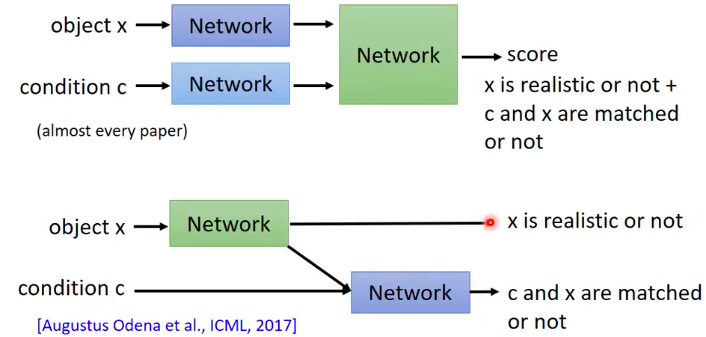

> 说明：传统的架构是第一种，而对于第二种的解释是在生成的对象时正确的，而只是条件不匹配时，我希望是能够最小化条件，而不需要最小化生成对象...

Stack GAN

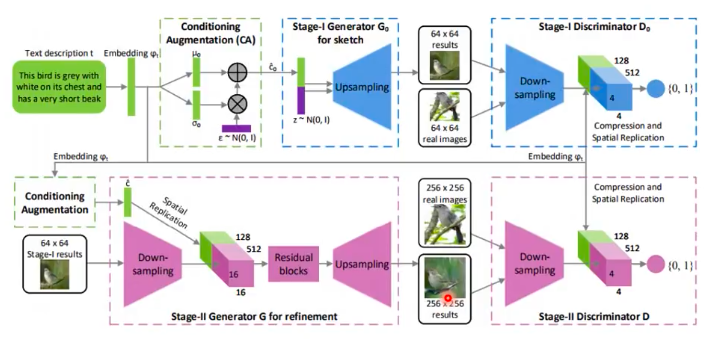

在图像生成图像的例子中，同样需要有生成图像和要求生成样式的条件的配对，而在生成阶段也要求输入这个条件，要求生成的图像尽量与真实样本越接近越好...

判别器判定单个Piexl，称为Pixel GAN，而对部分的判定称为Patch GAN，判定整张的参数过多，判定每个Piexl的，可能导致生成的效果会不好... 对于大像素的图像的生成，一般会使用Patch GAN...

除了应用在图像上，还有用作语音去燥，视频生成等...

图像到图像的应用有，风格转换，图像上色等... 